In [1]:
#! pip install pandas numpy matplotlib seaborn openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data preprocessing and EDA
file_path = "ebayAuctions.xlsx"
df = pd.read_excel(file_path, sheet_name='eBay auctions', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [ ]:
df.columns = [col.strip() for col in df.columns]
df.columns = [col.replace("?","") for col in df.columns] # remove "?" in column names
df.rename(columns={"sellerRating": "SellerRating", "endDay": "EndDay"}, inplace=True)
# rename upper case and lower case
df.head()

,Category,Currency,SellerRating,Duration,EndDay,ClosePrice,OpenPrice,Competitive
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   SellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   EndDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive   1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


,SellerRating,Duration,ClosePrice,OpenPrice,Competitive
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [49]:
df['Competitive'] = df['Competitive'].astype(bool)
#df.head()

In [ ]:
numeric = df.select_dtypes(include=[np.number]).columns.tolist() # get numeric columns
categorical = df.select_dtypes(include=['object','category']).columns.tolist() # get categorical columns

numeric, categorical

(['SellerRating', 'Duration', 'ClosePrice', 'OpenPrice'],
 ['Category', 'Currency', 'EndDay'])

In [51]:
def mark_outliers(s, lower=0.01, upper=0.99):
    lo, hi = s.quantile([lower, upper])
    return (s < lo) | (s > hi)

# Only continuous features
cont_cols = ['OpenPrice', 'ClosePrice', 'SellerRating']

for c in cont_cols:
    df[f"{c}_outlier"] = mark_outliers(df[c]) #finding outliers in each continious column

#df.head()


In [ ]:
dummies = pd.get_dummies(df[categorical], drop_first=False) # convert categorical to dummies
data = pd.concat([df[numeric + ['Competitive']], dummies], axis=1) #consrtuct new dataframe
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SellerRating                   1972 non-null   int64  
 1   Duration                       1972 non-null   int64  
 2   ClosePrice                     1972 non-null   float64
 3   OpenPrice                      1972 non-null   float64
 4   Competitive                    1972 non-null   bool   
 5   Category_Antique/Art/Craft     1972 non-null   bool   
 6   Category_Automotive            1972 non-null   bool   
 7   Category_Books                 1972 non-null   bool   
 8   Category_Business/Industrial   1972 non-null   bool   
 9   Category_Clothing/Accessories  1972 non-null   bool   
 10  Category_Coins/Stamps          1972 non-null   bool   
 11  Category_Collectibles          1972 non-null   bool   
 12  Category_Computer              1972 non-null   b

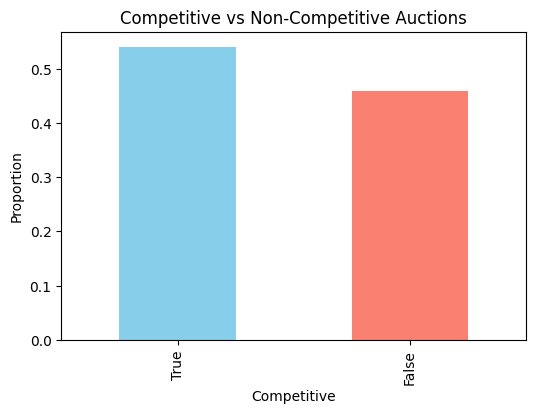

In [9]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(1,1,1)
counts = df['Competitive'].value_counts(normalize=True).plot(kind='bar', color=['skyblue','salmon'])
plt.title("Competitive vs Non-Competitive Auctions")
plt.ylabel("Proportion")
plt.show()

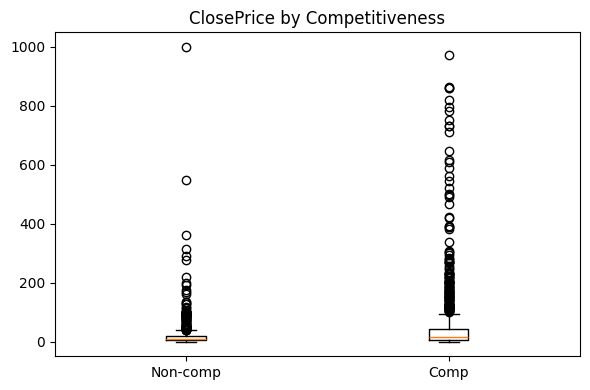

In [10]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)
lp0 = (df.loc[df['Competitive']==0,'ClosePrice'].dropna())
lp1 = (df.loc[df['Competitive']==1,'ClosePrice'].dropna())
ax2.boxplot([lp0, lp1], labels=['Non-comp','Comp'])
ax2.set_title('ClosePrice by Competitiveness')
plt.tight_layout()
plt.show()

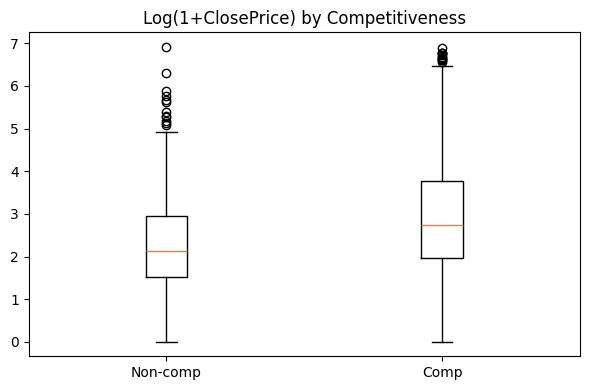

In [ ]:
# Log transform to reduce skewness
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)
lp0 = np.log1p(df.loc[df['Competitive']==0,'ClosePrice'].dropna())
lp1 = np.log1p(df.loc[df['Competitive']==1,'ClosePrice'].dropna())
ax2.boxplot([lp0, lp1], labels=['Non-comp','Comp'])
ax2.set_title('Log(1+ClosePrice) by Competitiveness')
plt.tight_layout()
plt.show()

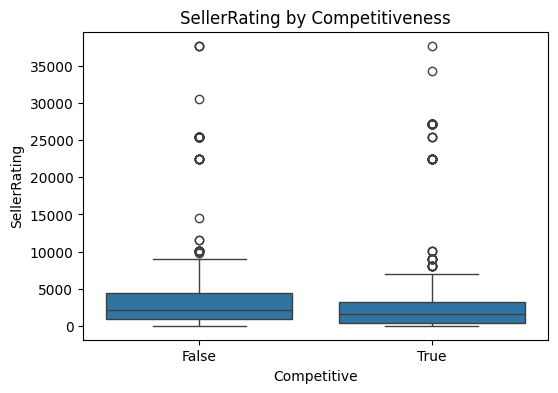

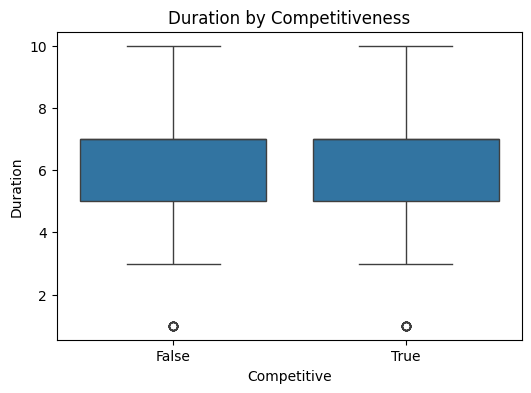

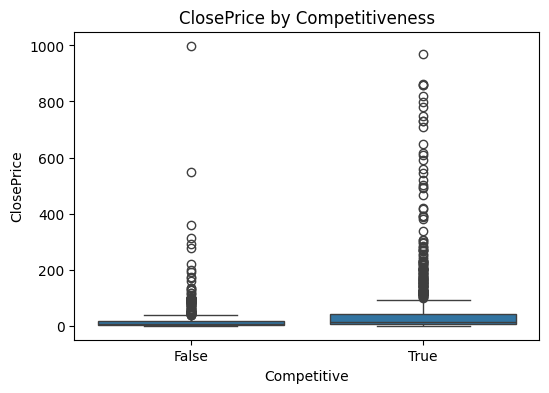

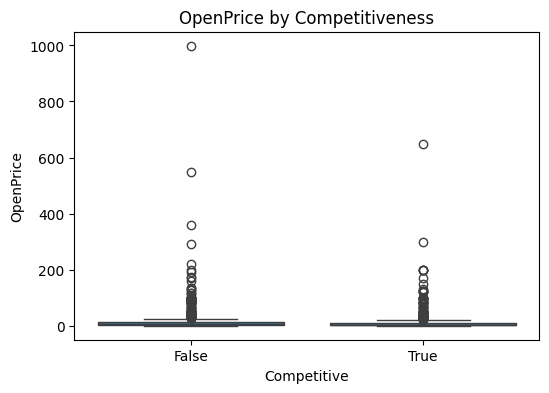

In [12]:
for col in numeric:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Competitive', y=col, data=df)
    plt.title(f"{col} by Competitiveness")
    plt.show()

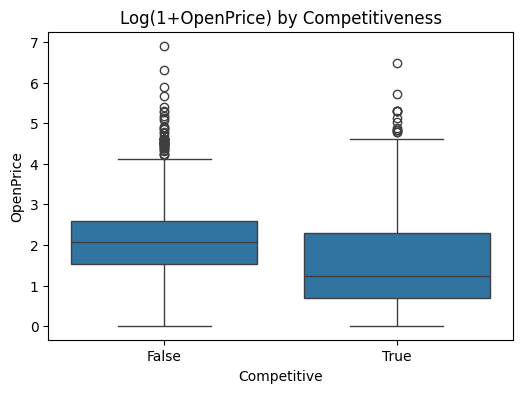

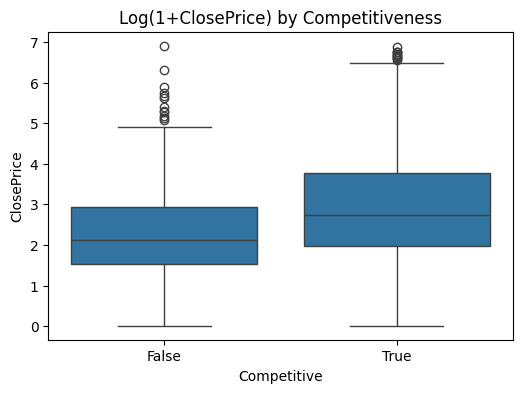

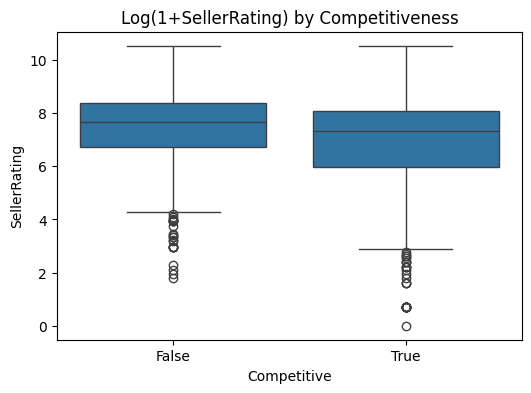

In [ ]:
log_cols = ['OpenPrice', 'ClosePrice', 'SellerRating']

# Log-scale plots for open price, close price, seller rating
for col in log_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Competitive', y=np.log1p(df[col]), data=df)
    plt.title(f"Log(1+{col}) by Competitiveness")
    plt.show()

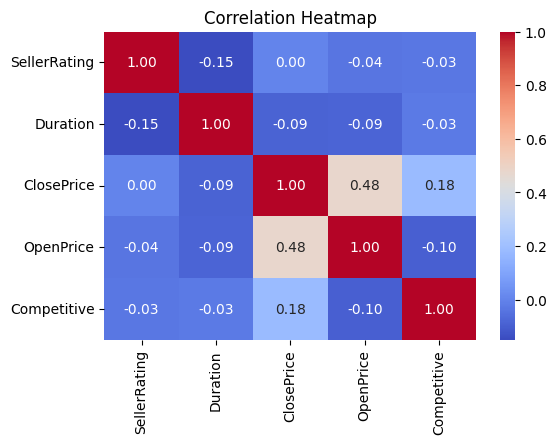

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric + ['Competitive']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

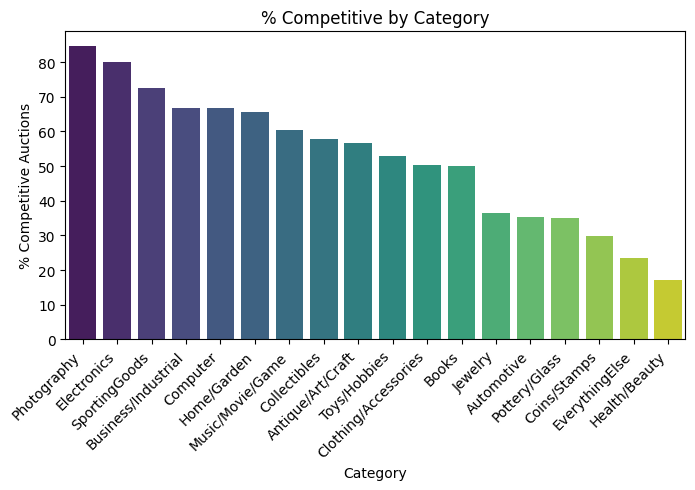

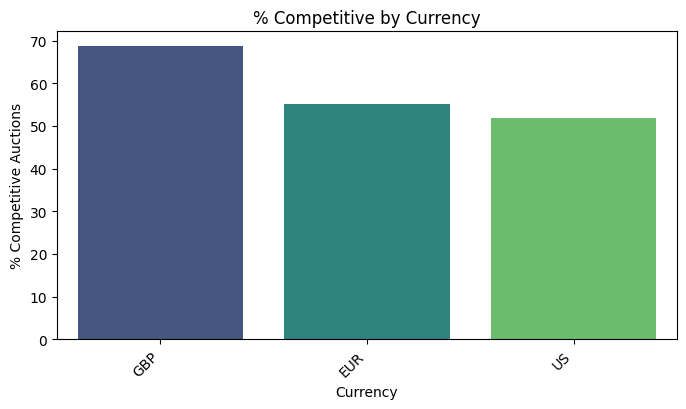

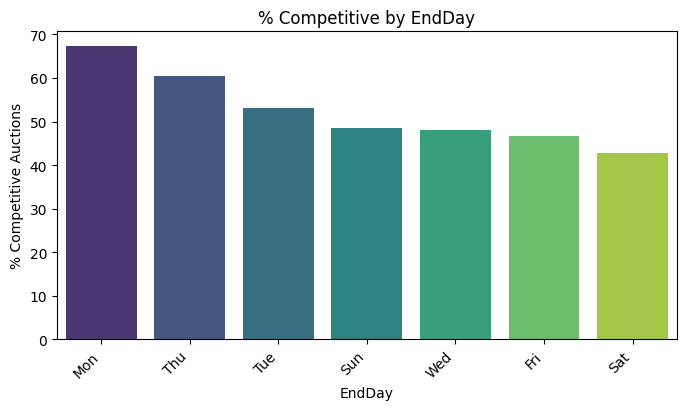

In [ ]:
# competive rate is the proportion of comepetitive auctions(more than 1 bid) in each category
for col in categorical:
    comp_rates = df.groupby(col)['Competitive'].mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(8,4))
    sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")
    plt.title(f"% Competitive by {col}")
    plt.ylabel("% Competitive Auctions")
    plt.xticks(rotation=45, ha="right")
    plt.show()

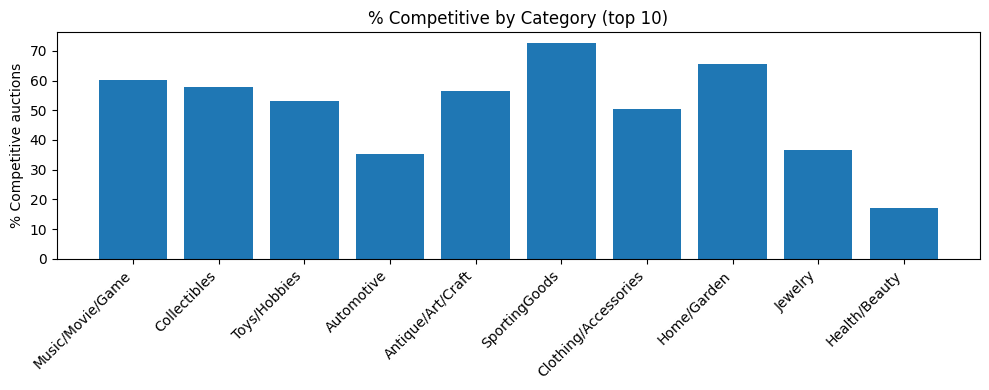

In [52]:
topcats = df['Category'].value_counts().nlargest(10).index.tolist() # top 10 categories by frequency
# filter only those 10 categories
# average of "competitive" (True=1), % competitive
# reorder to match frequency ranking
perc_comp = (df[df['Category'].isin(topcats)].groupby(df['Category'])['Competitive'].mean() * 100).reindex(topcats)                      
fig3 = plt.figure(figsize=(10,4))
ax3 = fig3.add_subplot(1,1,1)
ax3.bar(range(len(topcats)), perc_comp)
ax3.set_xticks(range(len(topcats)))
ax3.set_xticklabels(topcats, rotation=45, ha='right')
ax3.set_ylabel('% Competitive auctions')
ax3.set_title(f"% Competitive by Category (top {len(topcats)})")
plt.tight_layout()
plt.show()

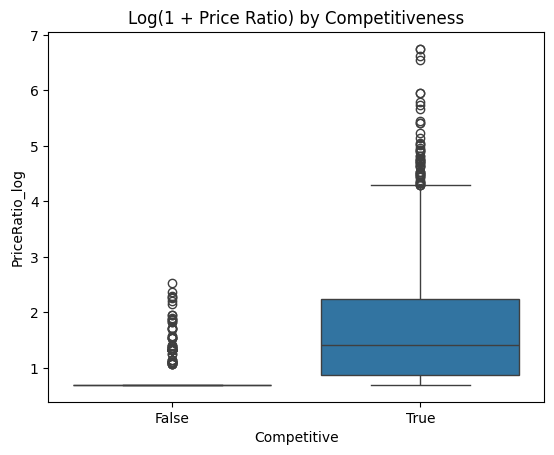

In [ ]:
# Sometimes it’s not the absolute prices but the markup that drives competitiveness.
# If price_ratio ≈ 1, auction closed near opening price, not many bids.
# If price_ratio >> 1, price grew a lot, competitive bidding.
# Log-transform price ratio
df['PriceRatio'] = (df['ClosePrice'] + 1) / (df['OpenPrice'] + 1) #+1 to avoid div by zero
df['PriceRatio_log'] = np.log1p(df['PriceRatio'])
sns.boxplot(x='Competitive', y='PriceRatio_log', data=df)
plt.title("Log(1 + Price Ratio) by Competitiveness")
plt.show()


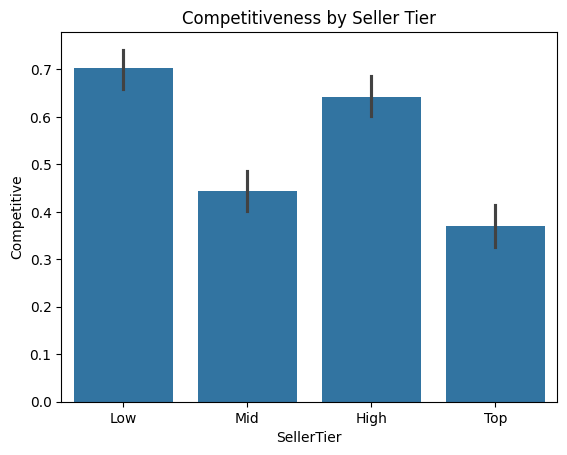

In [18]:
# Seller ratings are highly skewed; cut them into bins (newbie, mid, pro, power seller).
# Competitive auctions might be concentrated in trusted sellers.
df['SellerTier'] = pd.qcut(df['SellerRating'], q=4, labels=["Low","Mid","High","Top"])
sns.barplot(x='SellerTier', y='Competitive', data=df, estimator=np.mean)
plt.title("Competitiveness by Seller Tier")
plt.show()

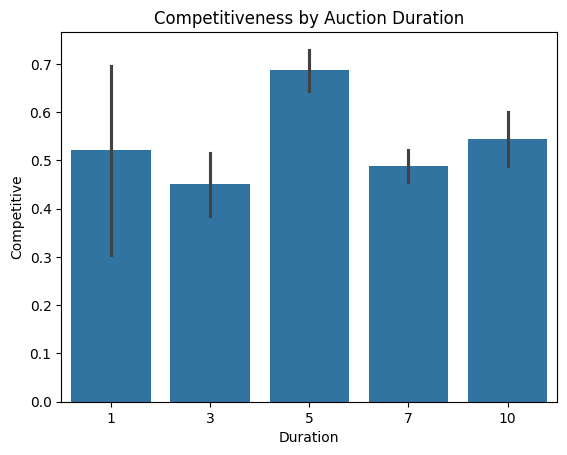

In [19]:
# Auctions of 3, 5, 7, 10 days may show very different competitiveness rates.
# A short 3-day auction might get fewer bids, but 7-day might build hype.
sns.barplot(x='Duration', y='Competitive', data=df, estimator=np.mean)
plt.title("Competitiveness by Auction Duration")
plt.show()

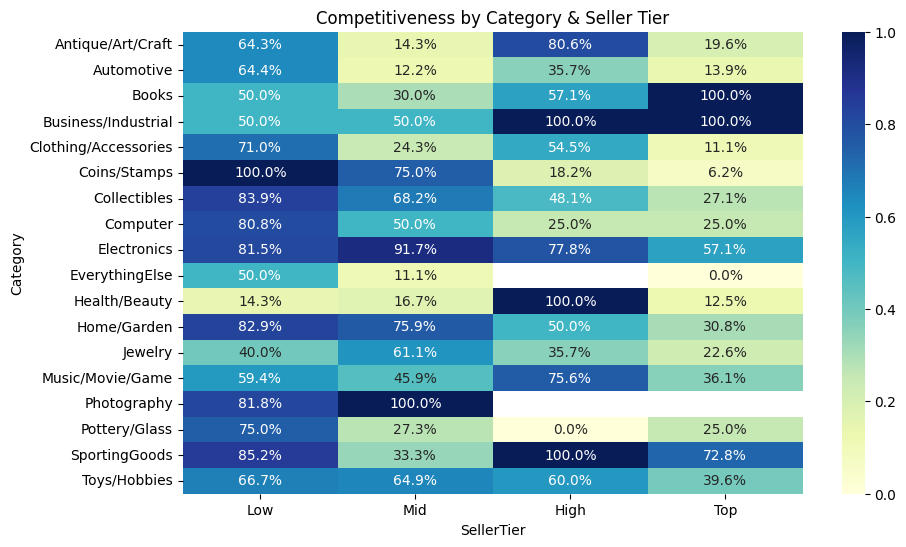

In [20]:
# Maybe high-rated sellers dominate competitive categories (e.g. Electronics, Jewelry).
# Heatmap can reveal that interaction.
pivot = df.pivot_table(index="Category", columns="SellerTier", values="Competitive", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1%", cmap="YlGnBu")
plt.title("Competitiveness by Category & Seller Tier")
plt.show()

In [21]:
# Decision Trees
#! pip install graphviz scikit-learn

import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
#!pip install dmba
from dmba import classificationSummary

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SellerRating                   1972 non-null   int64  
 1   Duration                       1972 non-null   int64  
 2   ClosePrice                     1972 non-null   float64
 3   OpenPrice                      1972 non-null   float64
 4   Competitive                    1972 non-null   bool   
 5   Category_Antique/Art/Craft     1972 non-null   bool   
 6   Category_Automotive            1972 non-null   bool   
 7   Category_Books                 1972 non-null   bool   
 8   Category_Business/Industrial   1972 non-null   bool   
 9   Category_Clothing/Accessories  1972 non-null   bool   
 10  Category_Coins/Stamps          1972 non-null   bool   
 11  Category_Collectibles          1972 non-null   bool   
 12  Category_Computer              1972 non-null   b

In [23]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [24]:
X = data.drop(columns=["Competitive"])
y = data["Competitive"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
fullClassTree = DecisionTreeClassifier(random_state=1, min_samples_leaf=50) 
fullClassTree.fit(X_train, y_train)
y_predicted = fullClassTree.predict(X_test)
accuracy_score(y_test, y_predicted)

0.8162230671736375

In [25]:
classificationSummary(y_train, fullClassTree.predict(X_train))
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8242)

       Prediction
Actual   0   1
     0 468  85
     1 123 507
Confusion Matrix (Accuracy 0.8162)

       Prediction
Actual   0   1
     0 305  48
     1  97 339


In [26]:
feature_names = list(X.columns)
list_int = list(y.unique())
class_names = list(map(str, list_int))
text_representation = tree.export_text(fullClassTree, feature_names = feature_names)
print(text_representation)

|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 1.03
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  1.03
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- Duration <= 8.50
|   |   |   |--- class: 1
|   |   |--- Duration >  8.50
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.97
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  4.97
|   |   |   |--- ClosePrice <= 6.82
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  6.82
|   |   |   |   |--- OpenPrice <= 7.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- OpenPrice >  7.99
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  10.00
|   |   |--- OpenPrice <= 10.97
|   |   |   |--- OpenPrice <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  9.89
|   |   |   |   |--- class: 1
|   |   |---

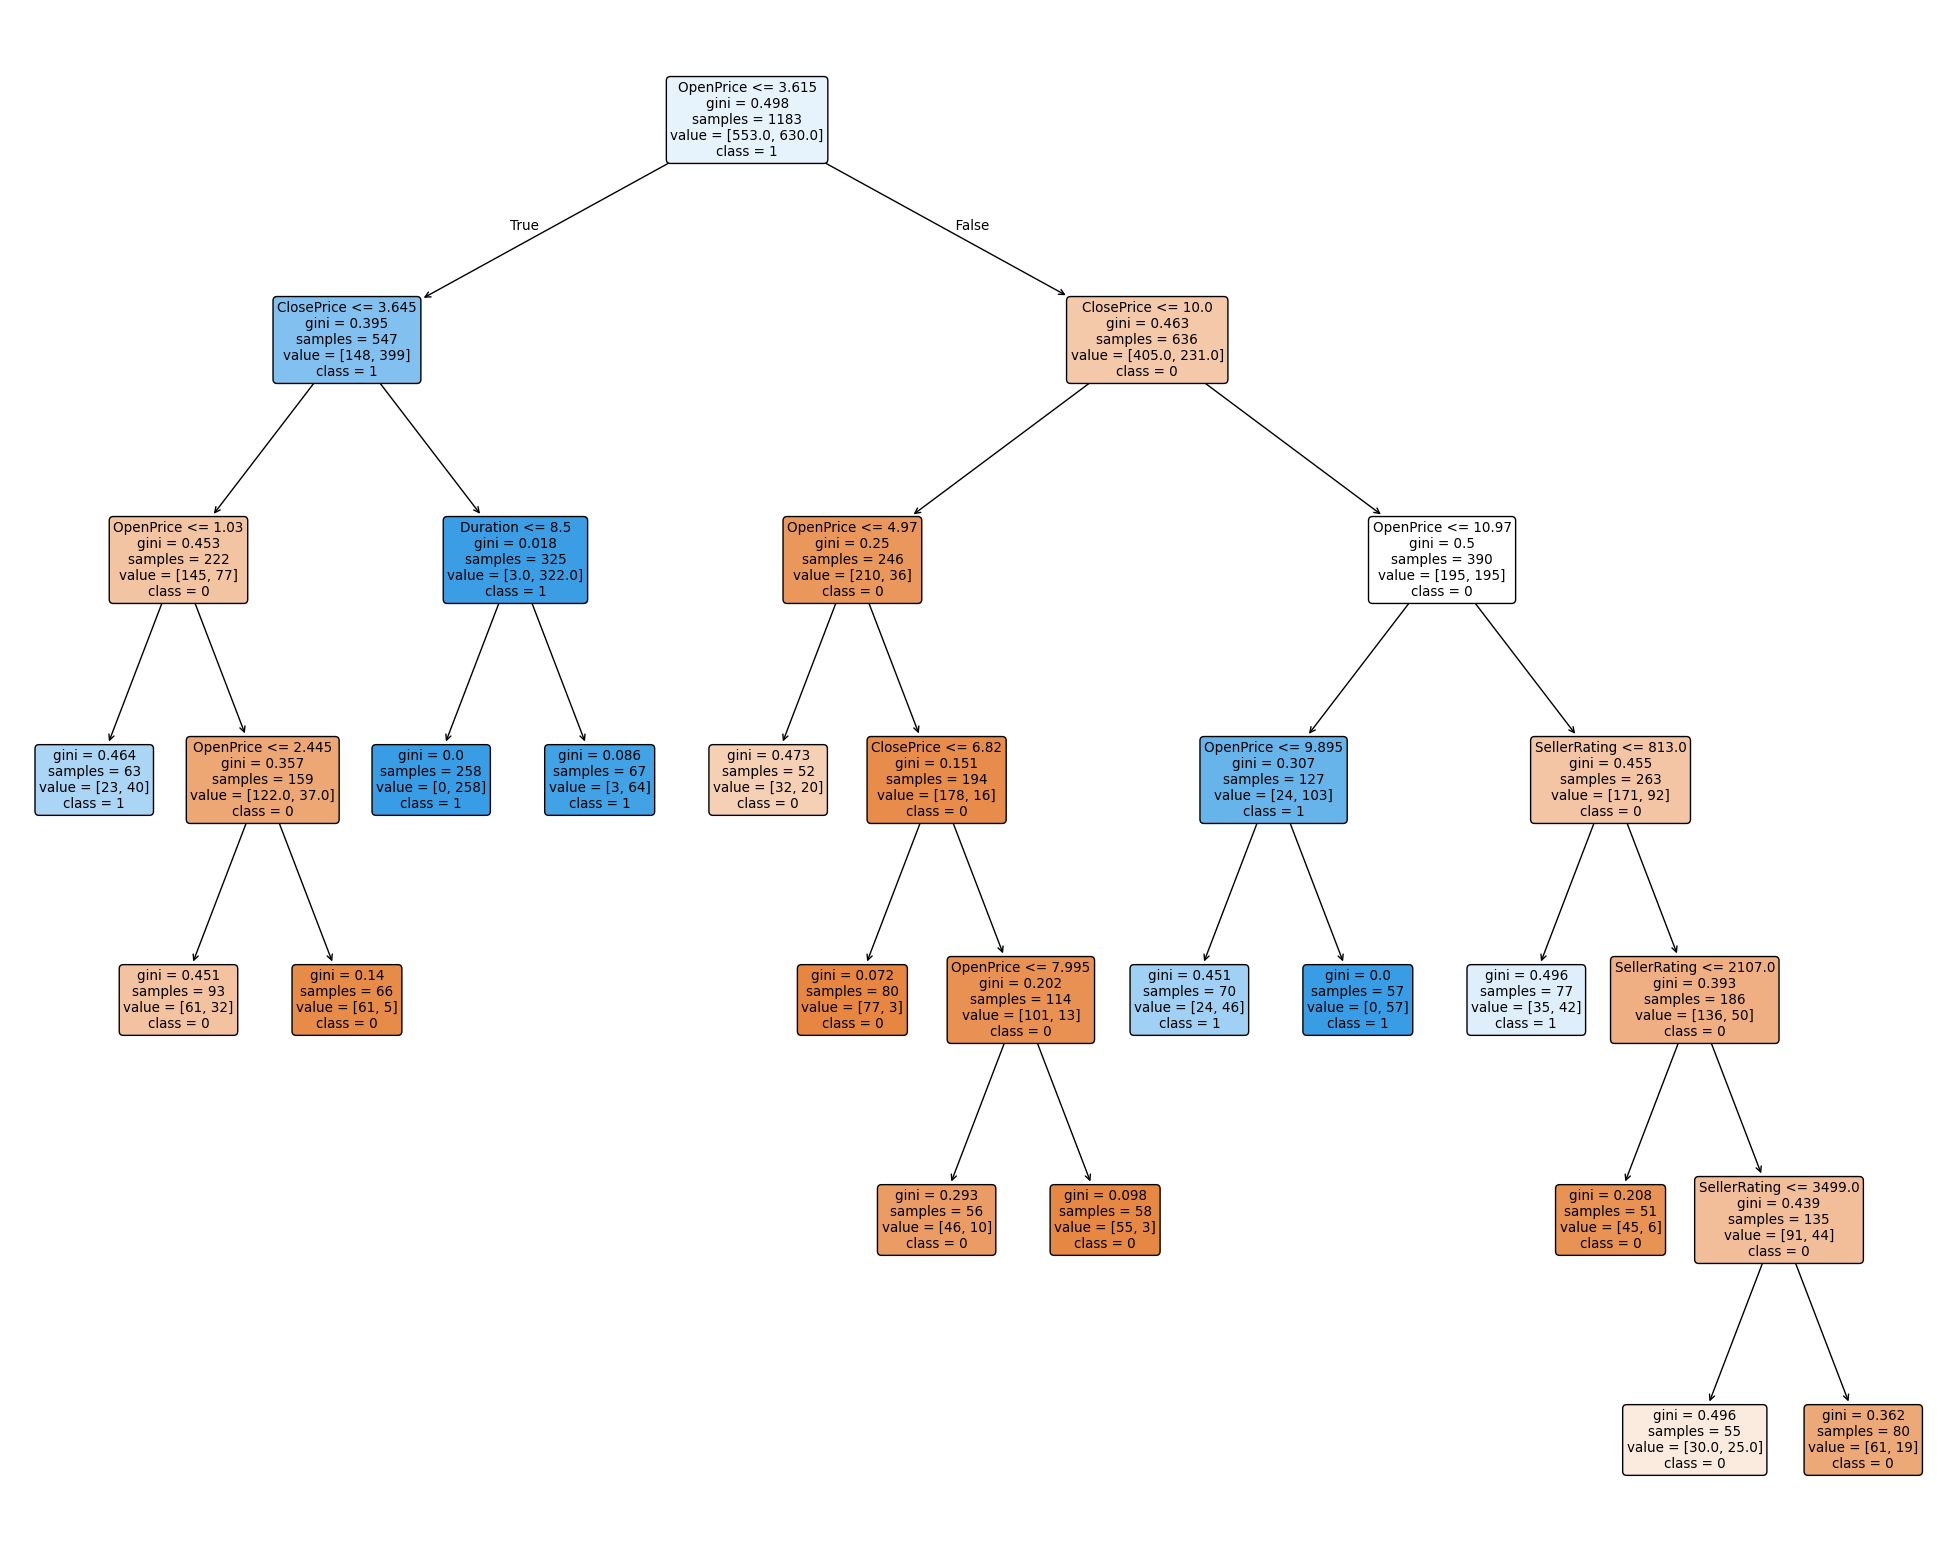

In [27]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(fullClassTree, feature_names=feature_names, class_names=class_names,
              rounded=True, filled=True)
%matplotlib inline
plt.show()

In [28]:
feature_importances = pd.Series(fullClassTree.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False)

OpenPrice                        0.482105
ClosePrice                       0.470629
SellerRating                     0.046586
Duration                         0.000680
Category_Antique/Art/Craft       0.000000
Category_Automotive              0.000000
Category_Books                   0.000000
Category_Business/Industrial     0.000000
Category_Clothing/Accessories    0.000000
Category_Coins/Stamps            0.000000
Category_Collectibles            0.000000
Category_Computer                0.000000
Category_Electronics             0.000000
Category_EverythingElse          0.000000
Category_Health/Beauty           0.000000
Category_Home/Garden             0.000000
Category_Jewelry                 0.000000
Category_Music/Movie/Game        0.000000
Category_Photography             0.000000
Category_Pottery/Glass           0.000000
Category_SportingGoods           0.000000
Category_Toys/Hobbies            0.000000
Currency_EUR                     0.000000
Currency_GBP                     0

In [29]:
# For new auctions

# For the two-way scatter diagram illustration, only two predictors SellerRating and OpenPrice are used
# For better visualization, log-transform SellerRating and OpenPrice
data_clean = data
for c in ["OpenPrice","SellerRating"]:
    data_clean[f"{c}_log"] = np.log(data_clean[c]+1)

X = data_clean[["OpenPrice_log", "SellerRating_log"]]
y = data_clean["Competitive"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
newClassTree = DecisionTreeClassifier(random_state=1, min_samples_leaf=50) 
newClassTree.fit(X_train, y_train)
y_predicted = newClassTree.predict(X_test)
accuracy_score(y_test, y_predicted)

0.714828897338403

In [30]:
classificationSummary(y_train, newClassTree.predict(X_train))
classificationSummary(y_test, newClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.7270)

       Prediction
Actual   0   1
     0 363 190
     1 133 497
Confusion Matrix (Accuracy 0.7148)

       Prediction
Actual   0   1
     0 222 131
     1  94 342


In [31]:
feature_names = list(X.columns)
list_int = list(y.unique())
class_names = list(map(str, list_int))
text_representation = tree.export_text(newClassTree, feature_names = feature_names)
print(text_representation)

|--- OpenPrice_log <= 1.53
|   |--- OpenPrice_log <= 0.71
|   |   |--- SellerRating_log <= 8.05
|   |   |   |--- class: 1
|   |   |--- SellerRating_log >  8.05
|   |   |   |--- class: 1
|   |--- OpenPrice_log >  0.71
|   |   |--- SellerRating_log <= 7.77
|   |   |   |--- SellerRating_log <= 7.00
|   |   |   |   |--- SellerRating_log <= 6.20
|   |   |   |   |   |--- SellerRating_log <= 4.63
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- SellerRating_log >  4.63
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- SellerRating_log >  6.20
|   |   |   |   |   |--- class: 1
|   |   |   |--- SellerRating_log >  7.00
|   |   |   |   |--- OpenPrice_log <= 1.46
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- OpenPrice_log >  1.46
|   |   |   |   |   |--- class: 1
|   |   |--- SellerRating_log >  7.77
|   |   |   |--- class: 0
|--- OpenPrice_log >  1.53
|   |--- SellerRating_log <= 6.40
|   |   |--- SellerRating_log <= 4.86
|   |   |   |--- class: 1
|   |   |--- Sel

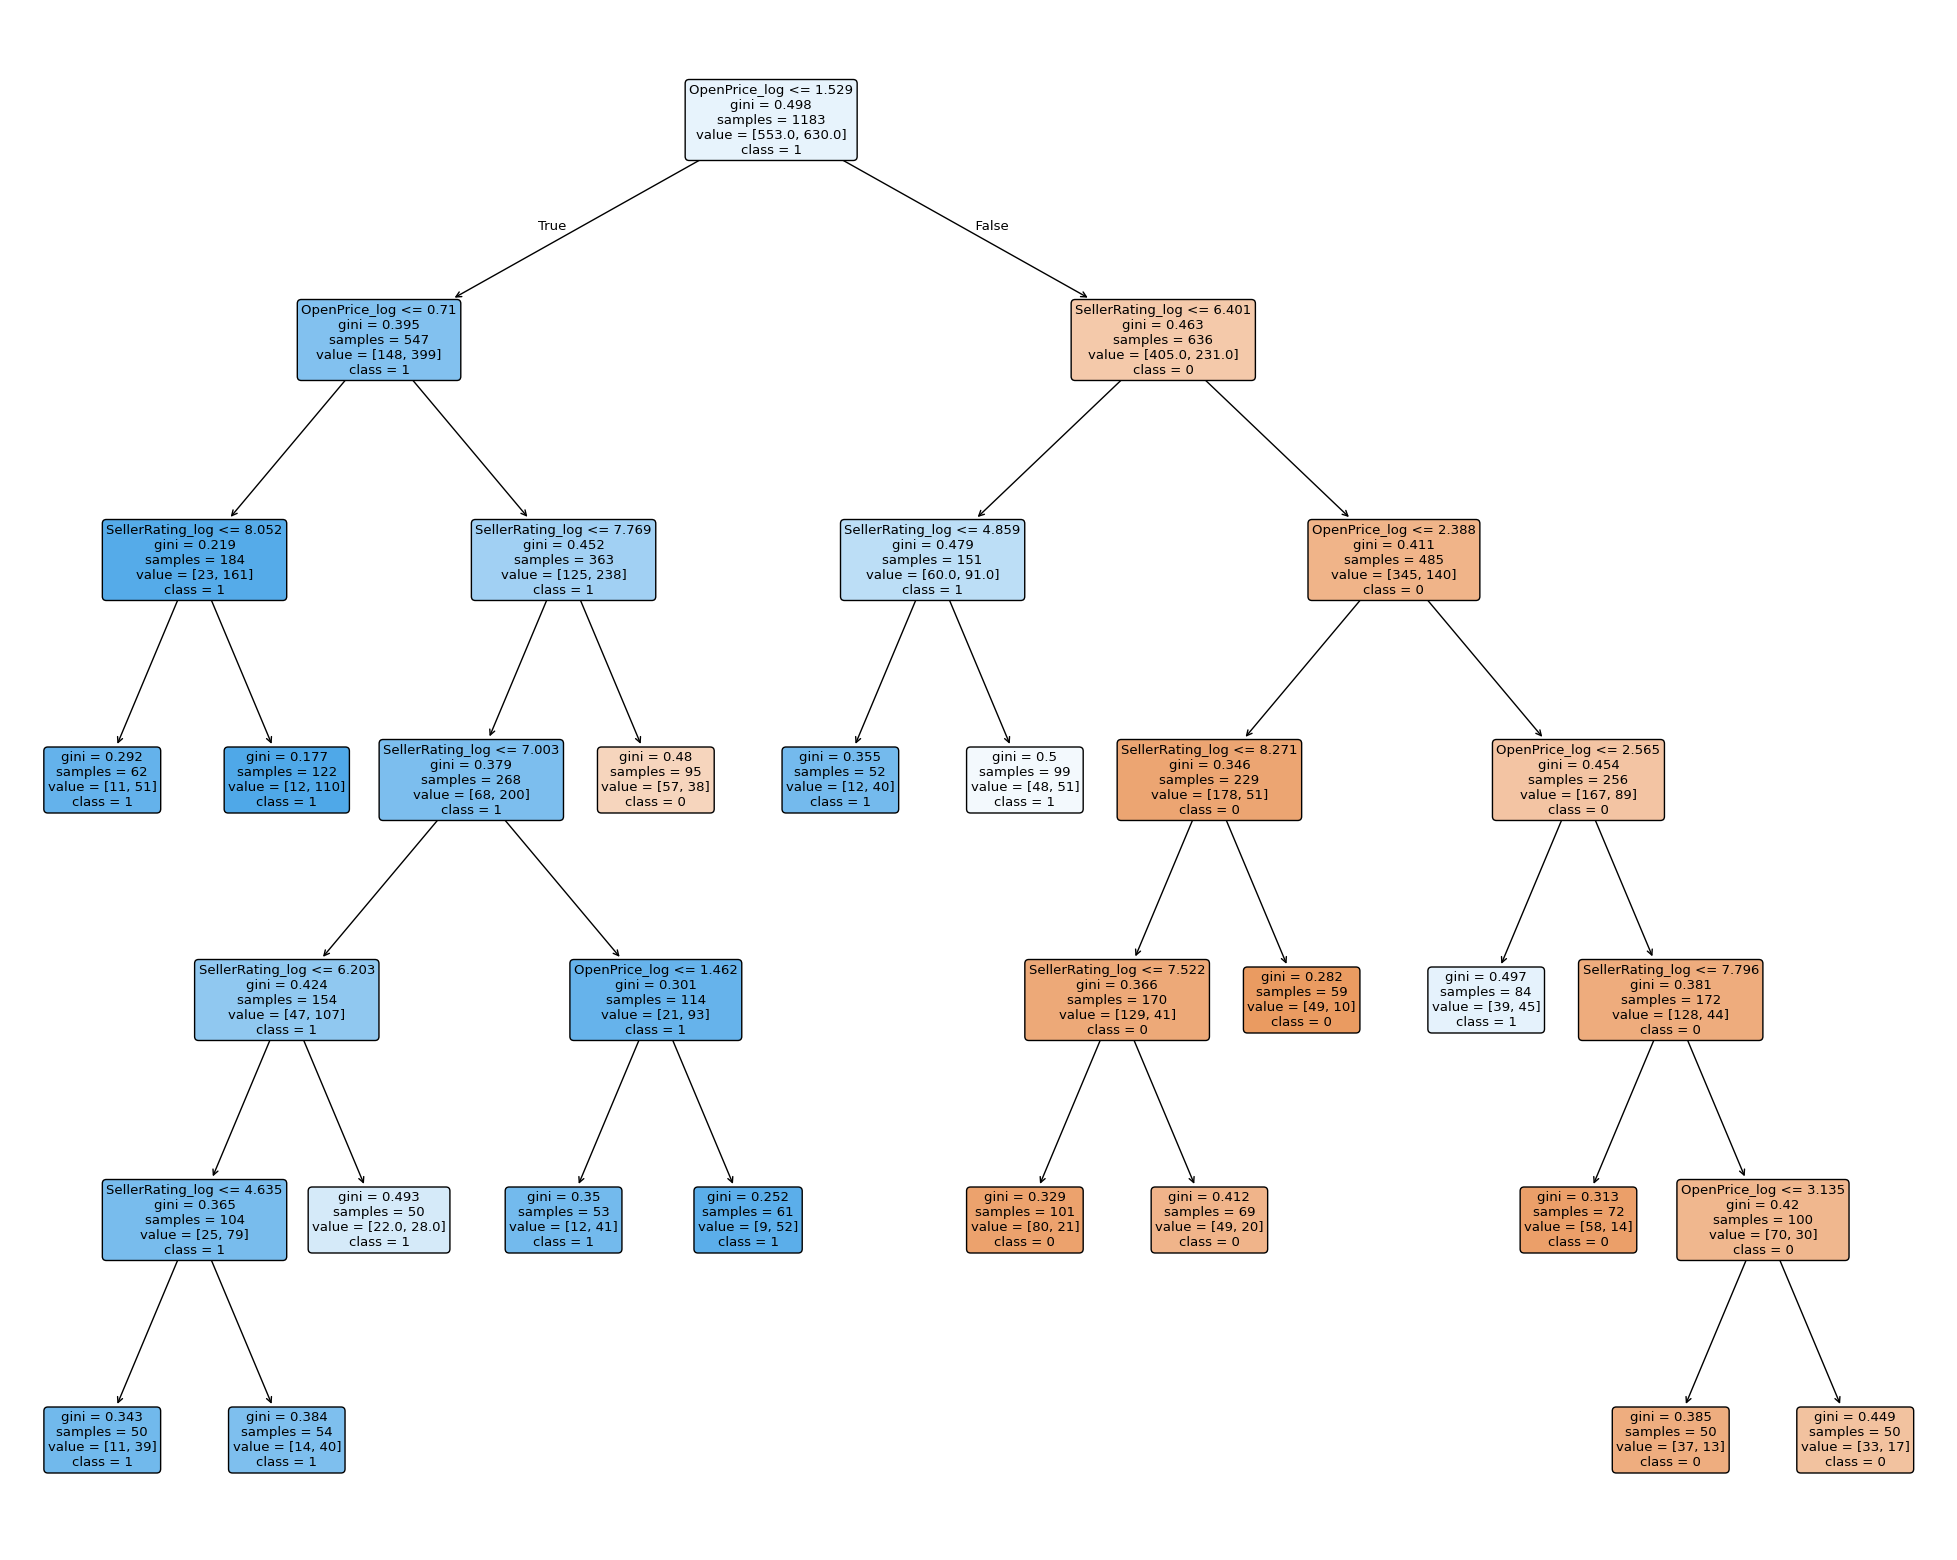

In [32]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(newClassTree, feature_names=feature_names, class_names=class_names,
              rounded=True, filled=True)
%matplotlib inline
plt.show()

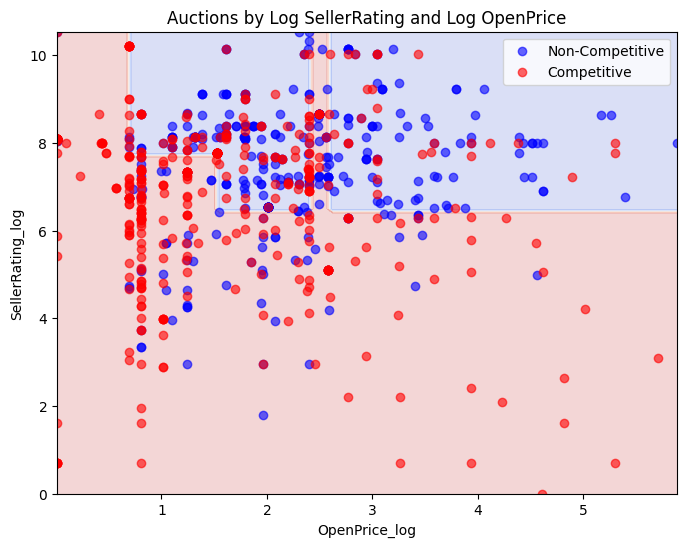

In [33]:
# Decision Tree boundary over scatter plot
x1 = X_test["OpenPrice_log"]
x2 = X_test["SellerRating_log"]

x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
xx, yy = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = newClassTree.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6)) 

plt.contourf(xx, yy, Z, levels=10, cmap="coolwarm", alpha=0.2)

plt.scatter(x1[y_test==0], x2[y_test==0], color='blue', label='Non-Competitive', alpha=0.6)
plt.scatter(x1[y_test==1], x2[y_test==1], color='red', label='Competitive', alpha=0.6)

plt.xlabel('OpenPrice_log')
plt.ylabel('SellerRating_log')
plt.title('Auctions by Log SellerRating and Log OpenPrice')
plt.legend()
plt.show()

In [34]:
data.head()

,SellerRating,Duration,ClosePrice,OpenPrice,Competitive,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,...,Currency_US,EndDay_Fri,EndDay_Mon,EndDay_Sat,EndDay_Sun,EndDay_Thu,EndDay_Tue,EndDay_Wed,OpenPrice_log,SellerRating_log
0,3249,5,0.01,0.01,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0.00995,8.08641
1,3249,5,0.01,0.01,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0.00995,8.08641
2,3249,5,0.01,0.01,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0.00995,8.08641
3,3249,5,0.01,0.01,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0.00995,8.08641
4,3249,5,0.01,0.01,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0.00995,8.08641


In [35]:
# For new auctions - final tree
# With all predictors except for OpenPrice, and no transformation as not relevant in general for decision trees

# Cross-validation Grid Search over Decision Tree parameters
X = data.drop(columns=["Competitive","ClosePrice","OpenPrice_log","SellerRating_log"])
y = data["Competitive"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
baseClassTree = DecisionTreeClassifier(random_state=1, min_samples_leaf=50) 

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [50],          # To prevent over-fitting
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=baseClassTree,
    param_grid=param_grid,
    cv=5,                  # 5-fold CV
    scoring='accuracy',
    n_jobs=-1              # run in parallel for speed
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


finalClassTree = grid_search.best_estimator_
y_pred = finalClassTree.predict(X_test)

Best parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 50, 'min_samples_split': 2}
Best CV accuracy: 0.7033183150969033


|--- OpenPrice <= 3.62
|   |--- OpenPrice <= 1.04
|   |   |--- SellerRating <= 3138.50
|   |   |   |--- class: 1
|   |   |--- SellerRating >  3138.50
|   |   |   |--- class: 1
|   |--- OpenPrice >  1.04
|   |   |--- SellerRating <= 2365.50
|   |   |   |--- class: 1
|   |   |--- SellerRating >  2365.50
|   |   |   |--- class: 0
|--- OpenPrice >  3.62
|   |--- SellerRating <= 601.50
|   |   |--- SellerRating <= 128.00
|   |   |   |--- class: 1
|   |   |--- SellerRating >  128.00
|   |   |   |--- class: 1
|   |--- SellerRating >  601.50
|   |   |--- Category_Toys/Hobbies <= 0.50
|   |   |   |--- class: 0
|   |   |--- Category_Toys/Hobbies >  0.50
|   |   |   |--- class: 0



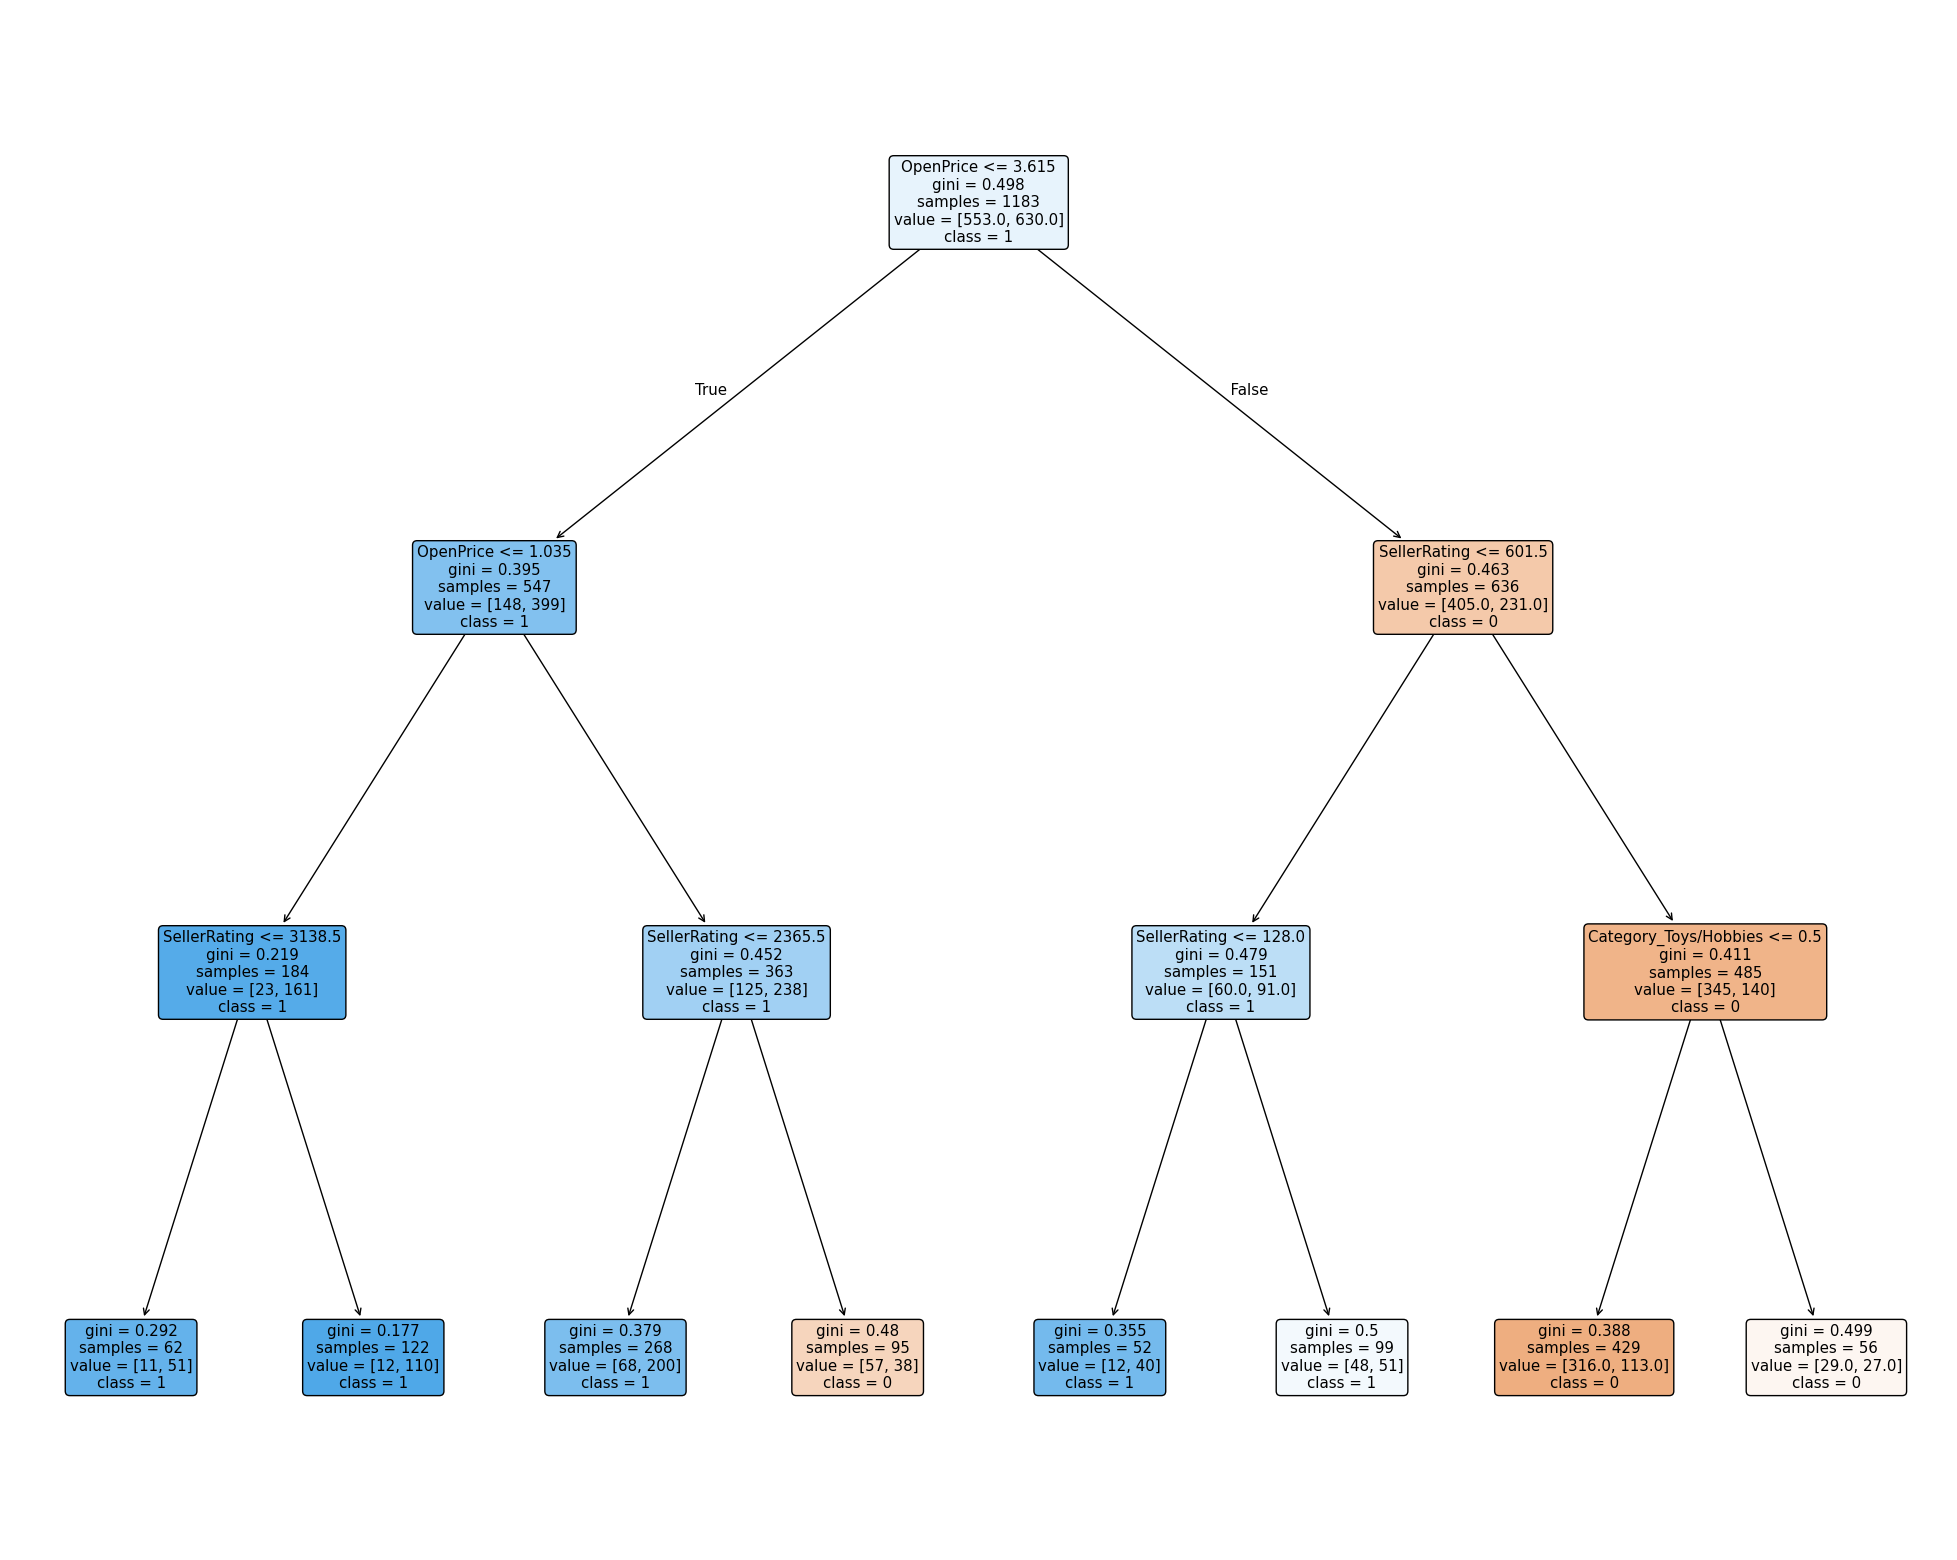

In [36]:
feature_names = list(X.columns)
list_int = list(y.unique())
class_names = list(map(str, list_int))
text_representation = tree.export_text(finalClassTree, feature_names = feature_names)
print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(finalClassTree, feature_names=feature_names, class_names=class_names,
              rounded=True, filled=True)
%matplotlib inline
plt.show()

In [37]:
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.7249683143219265


In [38]:
feature_importances = pd.Series(finalClassTree.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False)

OpenPrice                        0.648247
SellerRating                     0.317850
Category_Toys/Hobbies            0.033903
Category_Antique/Art/Craft       0.000000
Category_Automotive              0.000000
Category_Books                   0.000000
Duration                         0.000000
Category_Clothing/Accessories    0.000000
Category_Coins/Stamps            0.000000
Category_Collectibles            0.000000
Category_Computer                0.000000
Category_Electronics             0.000000
Category_EverythingElse          0.000000
Category_Health/Beauty           0.000000
Category_Business/Industrial     0.000000
Category_Home/Garden             0.000000
Category_Jewelry                 0.000000
Category_Photography             0.000000
Category_Music/Movie/Game        0.000000
Category_Pottery/Glass           0.000000
Category_SportingGoods           0.000000
Currency_EUR                     0.000000
Currency_GBP                     0.000000
Currency_US                      0

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [42]:
#y = df["Competitive?"].astype(int)
#X = df.drop(columns=["Competitive?"])
leak_cols = ["ClosePrice", "price_ratio", "price_ratio_log"]
X = X.drop(columns=[c for c in leak_cols if c in X.columns])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)
len(X_train), len(X_test), y_train.mean(), y_test.mean()

(1183, 789, np.float64(0.5401521555367709), np.float64(0.541191381495564))

In [43]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop",
)

pipe = Pipeline([
    ("prep", preprocess),
    ("knn", KNeighborsClassifier())
])

In [44]:
k_values = list(range(1, 32, 1))
cv_scores = []

for k in k_values:
    model = Pipeline([
        ("prep", preprocess),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

best_k = k_values[int(np.argmax(cv_scores))]
best_k, round(max(cv_scores), 3)

(3, np.float64(0.666))

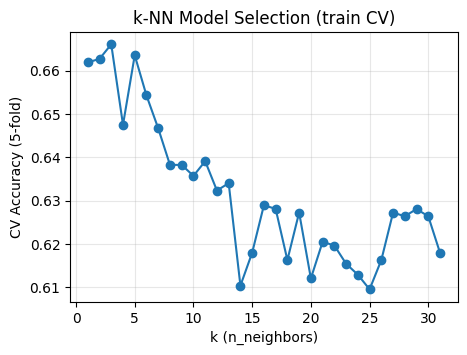

In [45]:
plt.figure(figsize=(5,3.5))
plt.plot(k_values, cv_scores, marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV Accuracy (5-fold)")
plt.title("k-NN Model Selection (train CV)")
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
best_model = Pipeline([
    ("prep", preprocess),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(
    y_test, y_pred,
    target_names=["Not Competitive (<2 bids)", "Competitive (≥2 bids)"],
    zero_division=0
)

print("=== Columns used ===")
print("Categorical:", cat_cols)
print("Numeric    :", num_cols)

print("\n=== Model selection (5-fold CV on train) ===")
print("k grid:", k_values)
print(f"Best k: {best_k} | CV accuracy: {max(cv_scores):.3f}")

print("\n=== Test performance (60/40 split) ===")
print(f"Test Accuracy: {acc:.3f}\n")
print("Classification Report:")
print(report)

print("Confusion Matrix [rows=true, cols=pred]:")
print(pd.DataFrame(
    cm,
    index=["True: Not Competitive", "True: Competitive"],
    columns=["Pred: Not Competitive", "Pred: Competitive"]
))

=== Columns used ===
Categorical: []
Numeric    : ['SellerRating', 'Duration', 'OpenPrice', 'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books', 'Category_Business/Industrial', 'Category_Clothing/Accessories', 'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer', 'Category_Electronics', 'Category_EverythingElse', 'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry', 'Category_Music/Movie/Game', 'Category_Photography', 'Category_Pottery/Glass', 'Category_SportingGoods', 'Category_Toys/Hobbies', 'Currency_EUR', 'Currency_GBP', 'Currency_US', 'EndDay_Fri', 'EndDay_Mon', 'EndDay_Sat', 'EndDay_Sun', 'EndDay_Thu', 'EndDay_Tue', 'EndDay_Wed']

=== Model selection (5-fold CV on train) ===
k grid: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Best k: 3 | CV accuracy: 0.666

=== Test performance (60/40 split) ===
Test Accuracy: 0.665

Classification Report:
                   

In [47]:
tn, fp, fn, tp = cm.ravel()
prec = tp / (tp + fp) if (tp + fp) else 0.0
rec  = tp / (tp + fn) if (tp + fn) else 0.0

print("\n=== Interpretation (for business) ===")
print(f"- Using k = {best_k}, accuracy on the hold-out set is {acc:.3f}.")
print(f"- For predicting COMPETITIVE auctions (≥2 bids): "
      f"precision = {prec:.3f}, recall = {rec:.3f}.")
print("- Precision: when we flag an auction as competitive, how often we’re right.")
print("- Recall: of all truly competitive auctions, how many we successfully flag.")
print("- Choose k / threshold to match costs: higher precision to limit promo spend; "
      "higher recall to capture more high-competition opportunities.")


=== Interpretation (for business) ===
- Using k = 3, accuracy on the hold-out set is 0.665.
- For predicting COMPETITIVE auctions (≥2 bids): precision = 0.690, recall = 0.693.
- Precision: when we flag an auction as competitive, how often we’re right.
- Recall: of all truly competitive auctions, how many we successfully flag.
- Choose k / threshold to match costs: higher precision to limit promo spend; higher recall to capture more high-competition opportunities.



=== Interpretation (for business) ===
- Using k = 15, accuracy on the hold-out set is 0.677.
- For predicting COMPETITIVE auctions (≥2 bids): precision = 0.714, recall = 0.792.
- Precision: when we flag an auction as competitive, how often we’re right.
- Recall: of all truly competitive auctions, how many we successfully flag.
- Choose k / threshold to match costs: higher precision to limit promo spend; higher recall to capture more high-competition opportunities.
